<a href="https://colab.research.google.com/github/abelxav/biblioteca_pandas/blob/main/Aula_18_Trabalhando_com_duas_bases_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [4]:
import pandas as pd
import seaborn as sns

Importando as tabelas

In [22]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


Analisando Dados

In [23]:
#Informações sobre os Dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [24]:
#Verificando dados repetidos
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


In [25]:
#Transformando dados como APP em Aplicativo
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [26]:
#Verificando na coluna "Nome_Departamento"
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [27]:
#Tirando o espaço e colocando _
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [28]:
#Verificando na coluna "estado"
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


In [30]:
#Olhando colunas que possuem nulo
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [33]:
#Olhando apenas os Nulos
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [34]:
#Apagando os Nulos
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [36]:
#Substituindo os nulos em estados
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [44]:
#Fazendo a média da coluna Preço e subistindo os nulos pela média
media_preco = vendas["Preço"].mean()
vendas.fillna({"Preço":media_preco}, inplace=True)

In [45]:
#Verificando dados nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Filtrando Dados

In [47]:
#Describe na tabela vendas
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [49]:
#Criando Datasets filtrando dados errados e certos
preco_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")

In [50]:
#Describe na tabela de dados certos
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [52]:
#Visualizando Tabela de Dados certos
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [54]:
#Filtrando Deparamento e Estado
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [69]:
#Departamentos mais vendidos
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index
vendas_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060
...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206


In [120]:
#Agrupando por Nome de Departamento e pegando a média de Preço com Frete
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [75]:
#Agrupando por Data e pegando IDs unicos
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

,idcompra
Data,
2023-02-13,226
2023-01-20,218
2023-03-07,215
2023-03-30,214
2023-02-20,214
...,...
2023-02-15,162
2023-04-04,162
2023-02-25,161


In [76]:
#Criando uma coluna com o mês das vendas
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto

<ipython-input-76-c2ee06dac646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2
...,...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429,1
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26,4
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128,3
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,4


In [77]:
#Agrupando pela coluna de mês e pegando IDs unicos
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending=False)

,idcompra
mes,
3,5590
4,5454
1,5309
2,5138


Segunda Base

In [78]:
#Importando a segunda base de dados e dando um head
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [79]:
#Head na basa de dados que já trabalhamos
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [81]:
#Describe por Idade e Renda na tabela Cliente
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [82]:
#Describe na tabela cliente
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [83]:
#Mudando o tipo de dado
cliente = cliente.astype({"renda": float})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


JOIN

In [85]:
#Fazendo um join dentrod o Python
vendas_cliente = vendas_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [88]:
#Agrupando por idcanalvenda e fazendo media de Renda
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [90]:
#Agrupando por Bandeira e fazendo media de idade
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


Import Biblioteca

In [91]:
import matplotlib.pyplot as plt

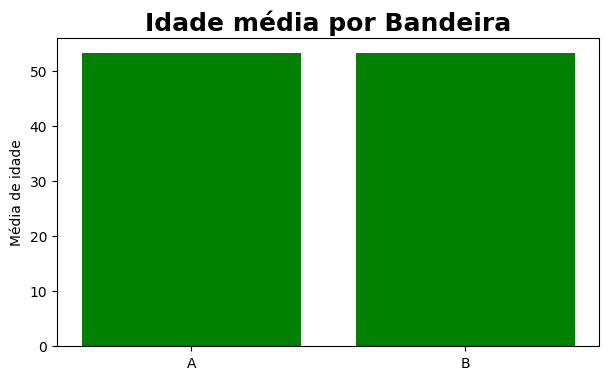

In [94]:
#Gráfico de Bandeira por Idade
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")

plt.ylabel("Média de idade")

plt.title("Idade média por Bandeira", loc="center", fontsize=18, fontweight="bold", color="black");

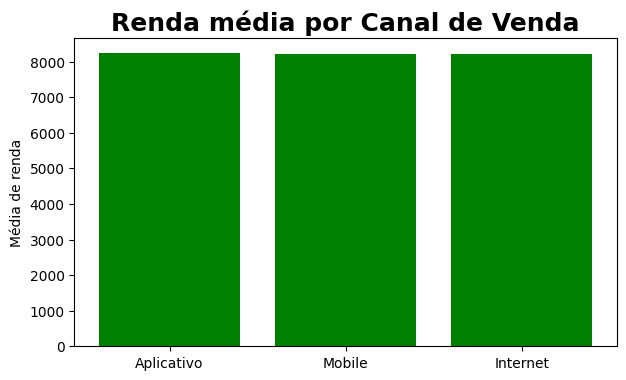

In [97]:
#Gráfico de IdCanalVenda por Renda
fig = plt.figure(figsize = (7,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")

plt.ylabel("Média de renda")

plt.title("Renda média por Canal de Venda", loc="center", fontsize=18, fontweight="bold", color="black");

In [99]:
#Agrupando por Data e pegando os ids únicos
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


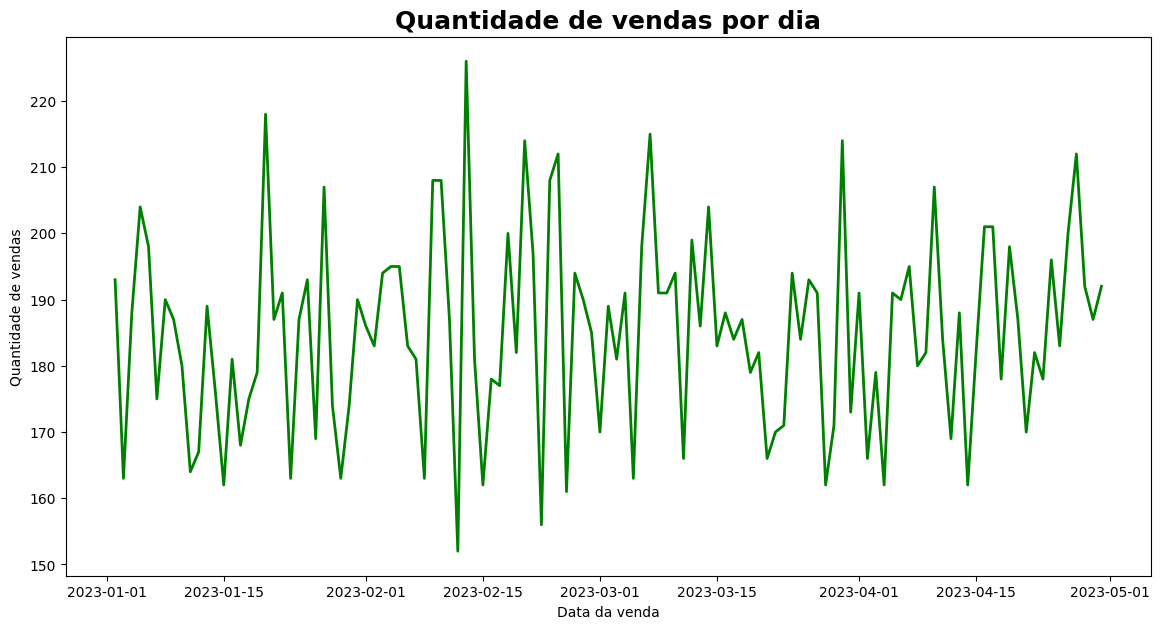

In [106]:
#Gráfico de Quantida de vendas por dia
fig = plt.figure(figsize=(14,7))

x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x,y, color="green", linewidth = "2")

plt.xlabel("Data da venda")

plt.ylabel("Quantidade de vendas")

plt.title("Quantidade de vendas por dia", loc="center", fontsize=18, fontweight="bold", color="black");

In [107]:
#Agrupando por nome de Departamento e fazendo a média de Preço com Frete
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


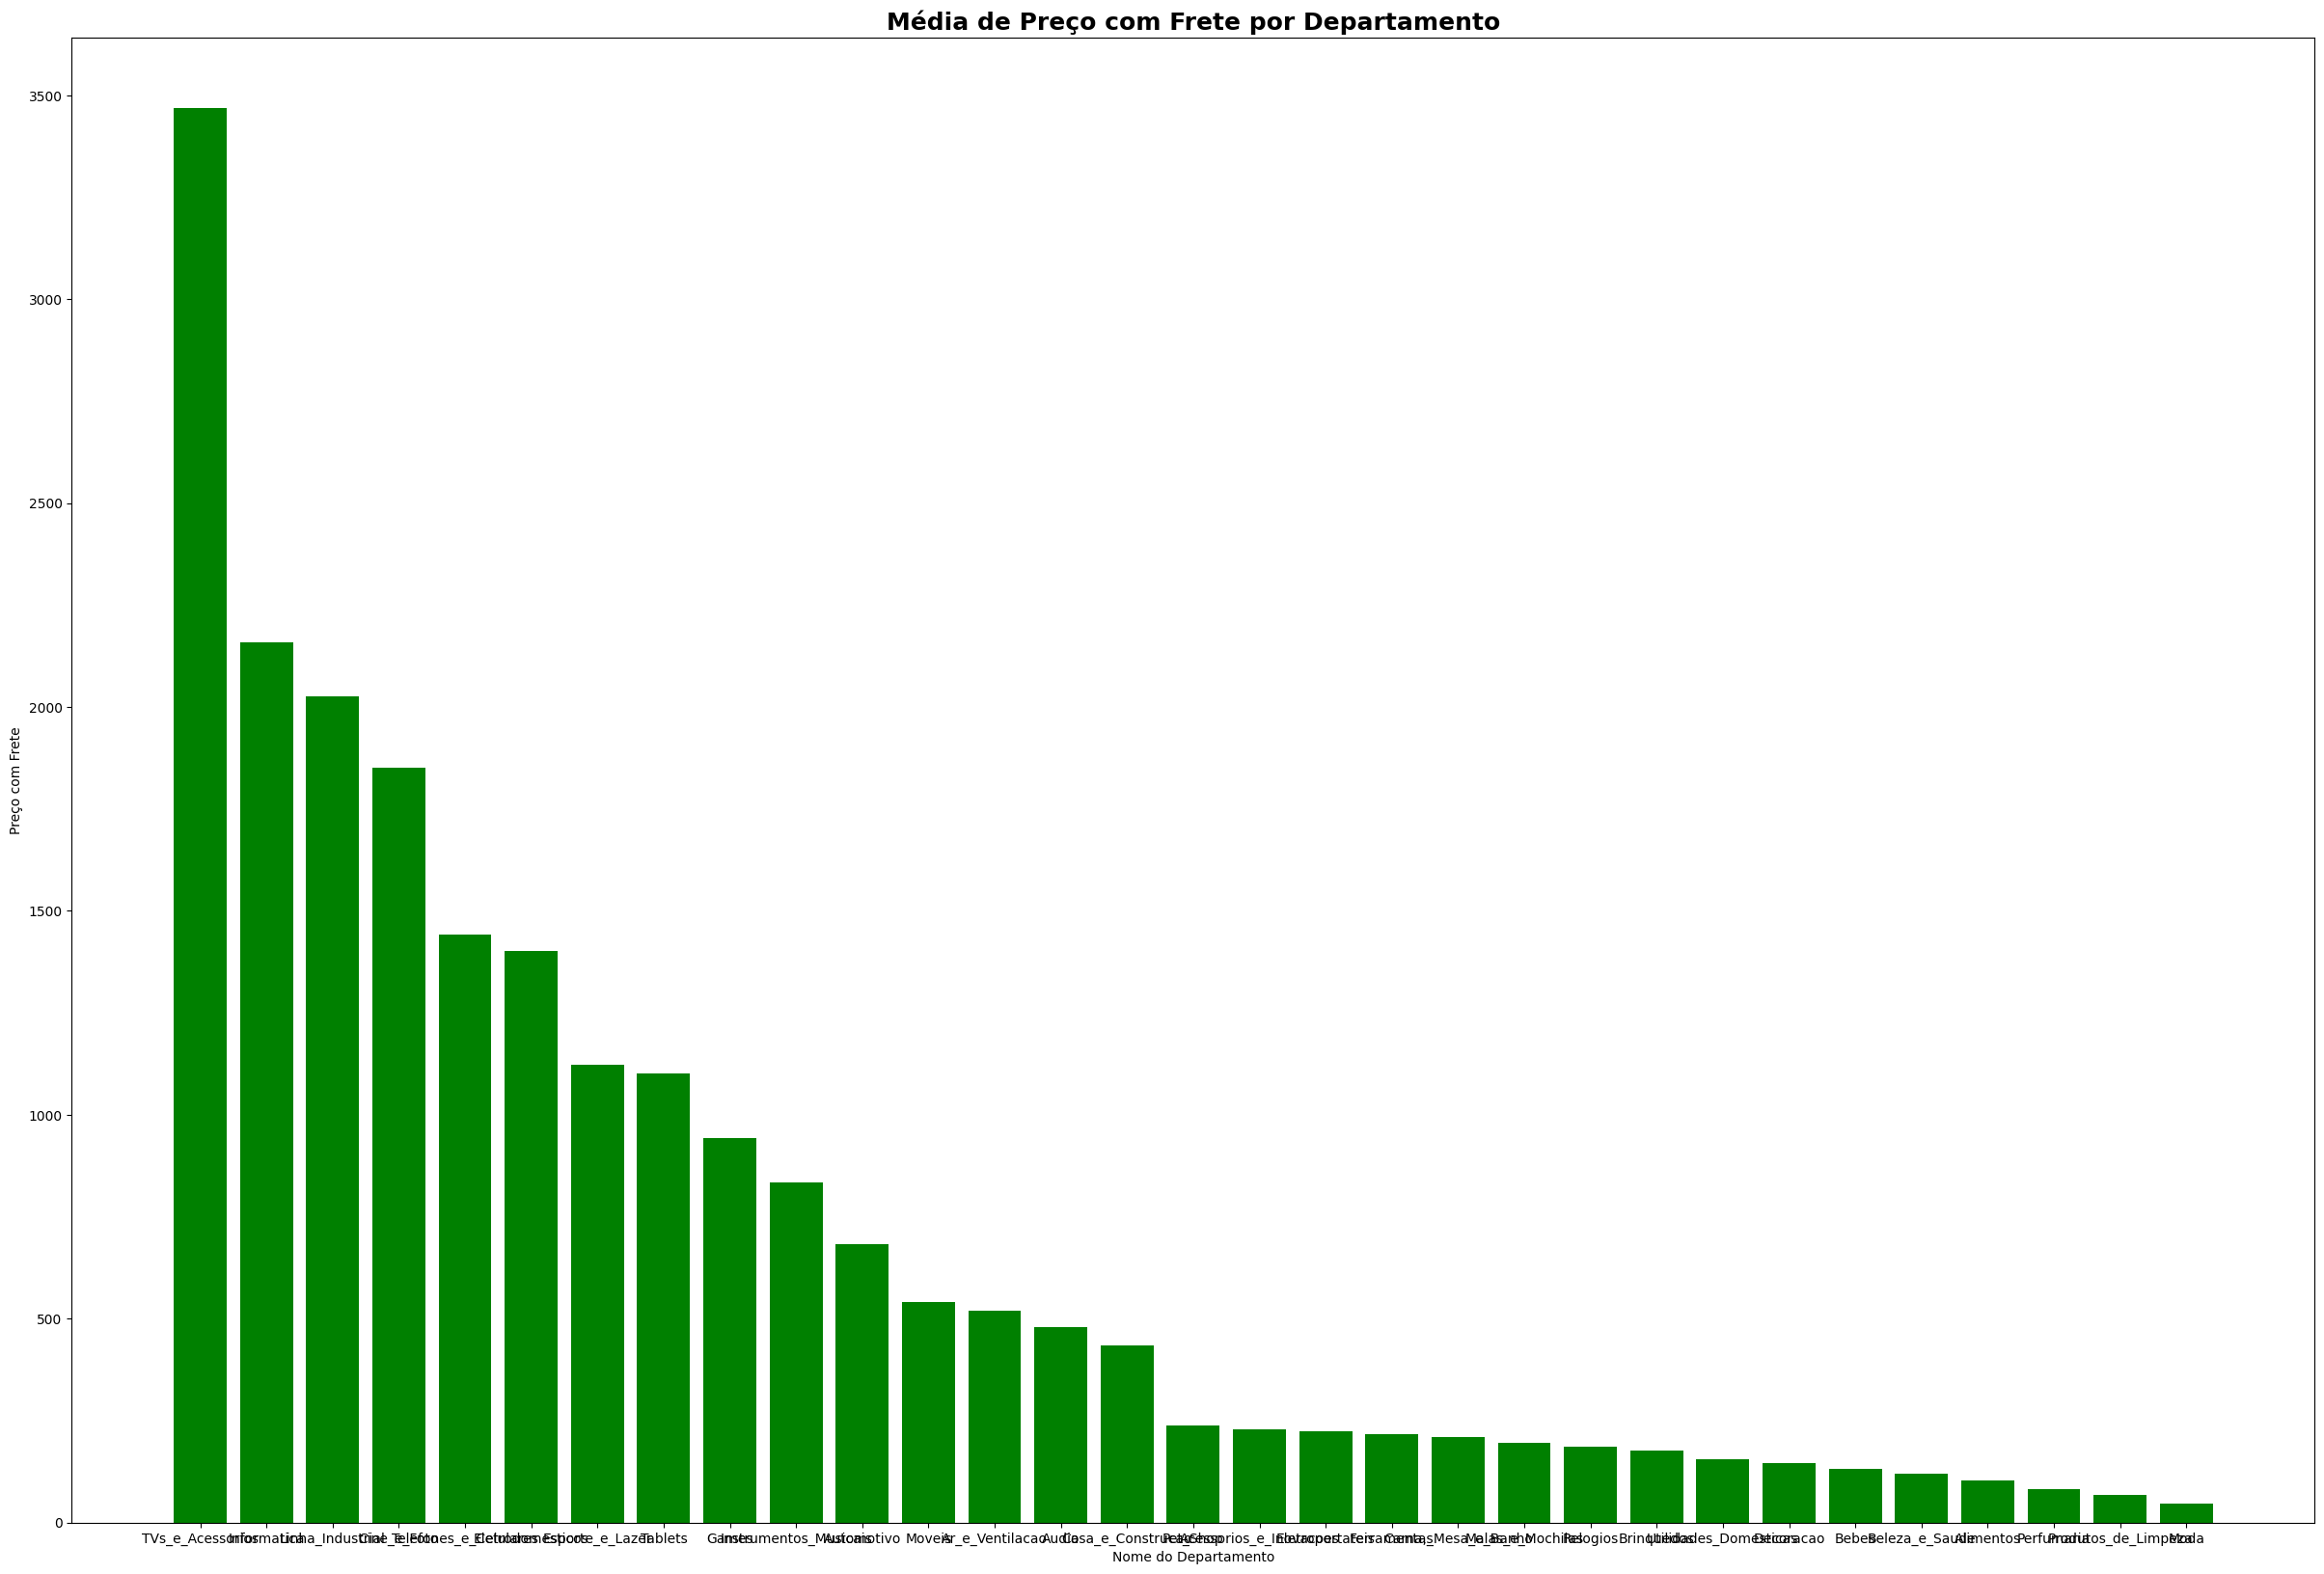

In [111]:
#Gráfico de Departamento e Média de Preço com Frete
fig = plt.figure(figsize=(30,20))

x = agg_dept_preco["Nome_Departamento"]
y = agg_dept_preco["Preço_com_frete"]

plt.bar(x,y, color="green")

plt.xlabel("Nome do Departamento")

plt.ylabel("Preço com Frete")

plt.title("Média de Preço com Frete por Departamento", loc="center", fontsize=18, fontweight="bold", color="black");

Instalando Biblioteca

In [113]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [114]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [115]:
#Gráfico de Bandeira por idade no Plotly
px.bar(agg_idade_bandeira, x="bandeira", y="idade")

In [116]:
#Gráfico de Data por idcompra no Plotly
px.line(venda_por_data, x="Data", y="idcompra")

In [119]:
#Gráfico de Detapartamento por Preço com Frete no Plotly
px.bar(agg_dept_preco, x="Nome_Departamento", y="Preço_com_frete")